In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import  warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
plt.rcParams['figure.figsize'] = [15,8]

**EDA:**

In [4]:
data = pd.read_csv('/content/drive/My Drive/Python for ML-Mahesh Anand/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.shape

(200, 5)

In [ ]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

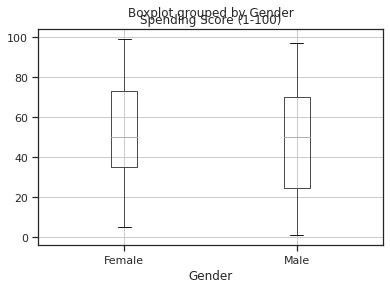

In [ ]:
data.boxplot(column='Spending Score (1-100)',by='Gender')

In [ ]:
data.shape

(200, 5)

In [ ]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
data['Gender']=data['Gender'].replace({'Male':0,'Female':1})

In [ ]:
df1=data[['Age','Spending Score (1-100)']]
df1.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [ ]:
df2=data[['Annual Income (k$)','Spending Score (1-100)']]
df2.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
df1_scaled=sc.fit_transform(df1)
df2_scaled=sc.fit_transform(df2)

In [ ]:
df1_sc_df=pd.DataFrame(df1_scaled)
df2_sc_df=pd.DataFrame(df2_scaled)


In [ ]:
df1_sc_df.columns=df1.columns
df2_sc_df.columns=df2.columns

In [ ]:
df1_sc_df.head()

,0,1
0,-1.424569,-0.434801
1,-1.281035,1.195704
2,-1.352802,-1.715913
3,-1.137502,1.040418
4,-0.563369,-0.395980


In [ ]:
df2_sc_df.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [ ]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Let's see our data's information:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


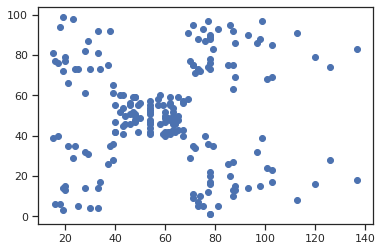

In [ ]:
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'])

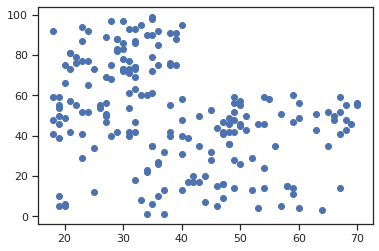

In [ ]:
plt.scatter(data['Age'],data['Spending Score (1-100)'])

In [ ]:
data.corr()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.057400,-0.026763,0.977548,0.013835
Gender,-0.057400,1.000000,-0.060867,-0.056410,0.058109
Age,-0.026763,-0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,0.058109,-0.327227,0.009903,1.000000


In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**So, we have equally separeted 70 x 3 classes of grain's in our data.**

**Let's visualize all the features using a pairplot:**

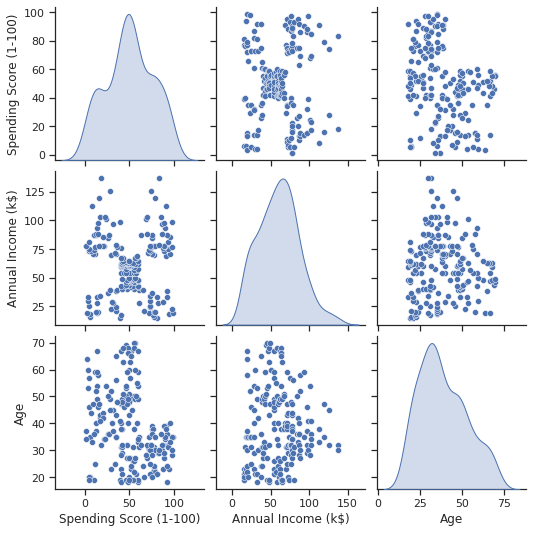

In [ ]:
sns.pairplot(data, vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'],diag_kind='kde')
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler
X=data[['Spending Score (1-100)', 'Annual Income (k$)','Age']]
sc=StandardScaler()
X_std=sc.fit_transform(X)
X_std_df=pd.DataFrame(X_std)

In [6]:
X_std_df.columns=X.columns

In [7]:
X_std_df.head()

,Spending Score (1-100),Annual Income (k$),Age
0,-0.434801,-1.738999,-1.424569
1,1.195704,-1.738999,-1.281035
2,-1.715913,-1.700830,-1.352802
3,1.040418,-1.700830,-1.137502
4,-0.395980,-1.662660,-0.563369


**K-MEANS CLUSTERING ALGORITHM:**

**Finding the best K value:**

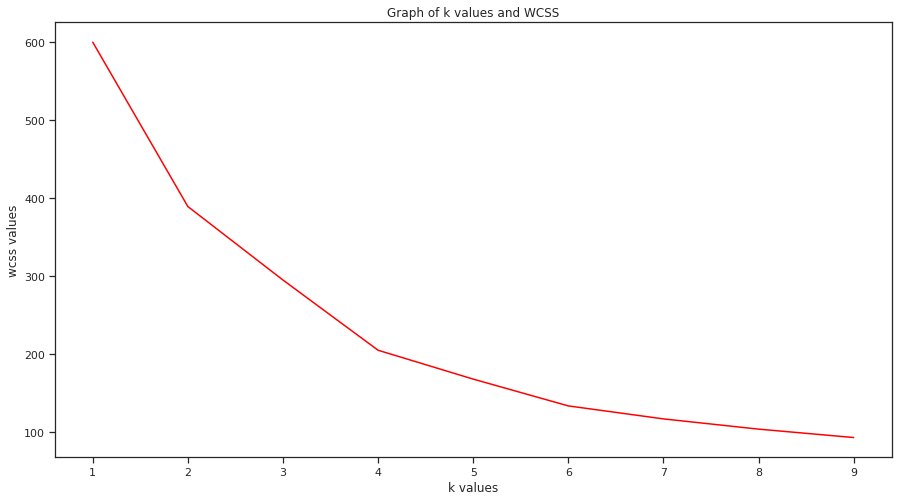

In [8]:
from sklearn.cluster import KMeans

inertia = [] #inertia (within cluster sum square) or total spread

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_std_df)
    inertia.append(kmeans.inertia_)
    
# Visualization of k values:

plt.plot(range(1,10), inertia, color='red')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()

**K-Means Clustering Algorithm:**

In [9]:
from sklearn.cluster import KMeans
m1 = KMeans(n_clusters=6,n_init=20,random_state=2)

In [10]:
m1.fit(X_std_df)

KMeans(n_clusters=6, n_init=20, random_state=2)

In [ ]:
from sklearn.cluster import KMeans
# Now we know our best k value is 3, I am creating a new kmeans model:
m2 = KMeans(n_clusters=5,n_init=20,random_state=2)

In [ ]:
m1.fit(df1_sc_df)

KMeans(n_clusters=4, n_init=20, random_state=2)

In [ ]:
m1.inertia_

133.86833362685582

In [ ]:
m1.labels_

array([2, 1, 2, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 2, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 0, 1, 0, 1,
       3, 1, 0, 2, 2, 2, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       1, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1,
       2, 1, 2, 1, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 0, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 0, 1, 2, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1,
       2, 1], dtype=int32)

In [ ]:
m1.cluster_centers_

array([[ 1.22927178, -0.06558366],
       [-0.61415725,  1.14971545],
       [-0.8346466 , -0.39442706],
       [ 0.62833625, -1.36651894]])

In [ ]:
m2.fit(df2_sc_df)

KMeans(n_clusters=5, n_init=20, random_state=2)

In [ ]:
centroids=m1.cluster_centers_
centroid_df = pd.DataFrame(centroids,columns = list(df1))
columns = list(df1)
centroid_df.columns=columns
centroid_df

,Age,Spending Score (1-100)
0,1.229272,-0.065584
1,-0.614157,1.149715
2,-0.834647,-0.394427
3,0.628336,-1.366519


In [11]:
centroids=m1.cluster_centers_
centroid_df = pd.DataFrame(centroids,columns = list(X_std_df))
centroid_df

,Spending Score (1-100),Annual Income (k$),Age
0,-0.093580,-0.113785,-0.873098
1,-0.043998,-0.240213,1.254721
2,1.239503,0.991583,-0.441917
3,1.037183,-1.325497,-0.976027
4,-1.290052,1.083225,0.221716
5,-1.196444,-1.308230,0.478957


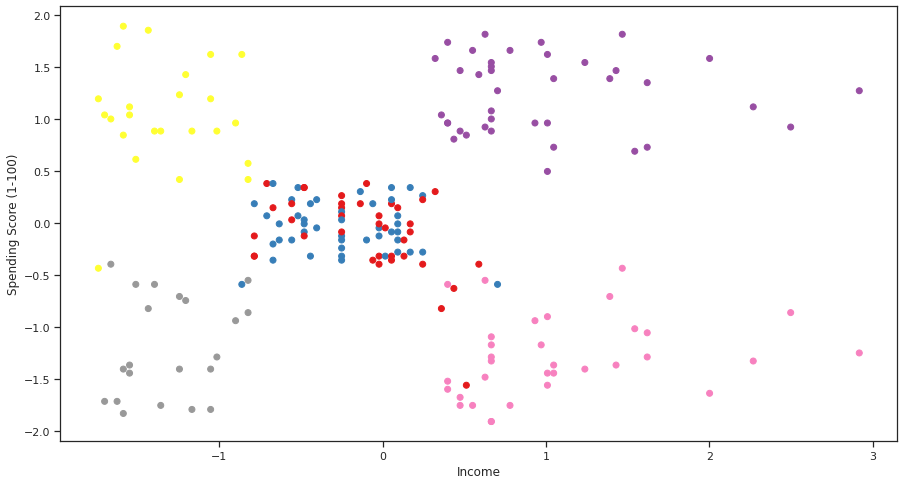

In [12]:
# 2D scatter plot of labelled records
plt.scatter(X_std[:, 1], X_std[:, 0], c=m1.labels_, cmap=plt.cm.Set1)
plt.xlabel('Income')
plt.ylabel('Spending Score (1-100)')
plt.show()

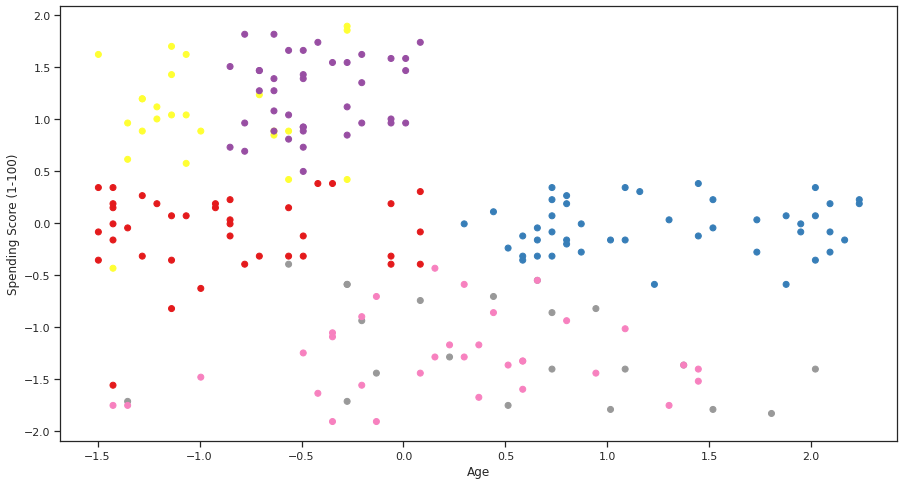

In [13]:
plt.scatter(X_std[:, 2], X_std[:, 0], c=m1.labels_, cmap=plt.cm.Set1)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
m1.inertia_

65.56840815571681

In [ ]:
from sklearn import metrics
metrics.silhouette_score(df1_scaled,m1.labels_)

0.08256536372739096

In [14]:
from mpl_toolkits.mplot3d import Axes3D

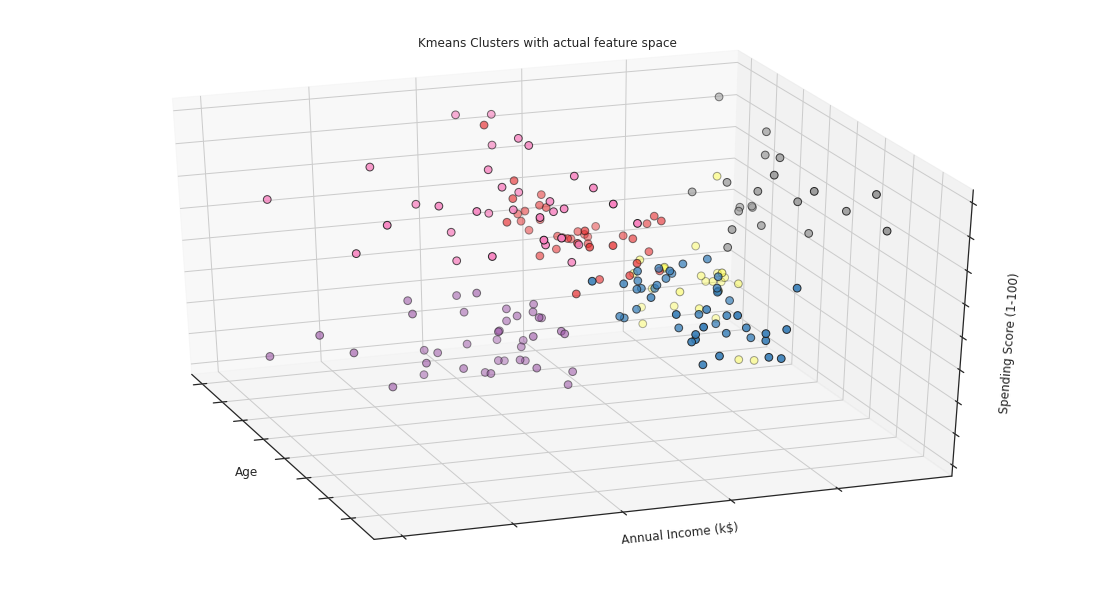

In [15]:
#3D scatter plot of labelled records
fig = plt.figure(1, figsize=(15, 8))
ax = Axes3D(fig, elev=-150, azim=200)
ax.scatter(X_std[:, 2], X_std[:, 1], X_std[:, 0], c=m1.labels_,
           cmap=plt.cm.Set1, edgecolor='k',s=60)
ax.set_title("Kmeans Clusters with actual feature space")
ax.set_xlabel('Age')
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel('Annual Income (k$)')
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel('Spending Score (1-100)')
ax.w_zaxis.set_ticklabels([])

plt.show()

In [ ]:
#3D plot using Plotly
import plotly.express as px
fig = px.scatter_3d(X_std_df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',color=m1.labels_)
fig.show()

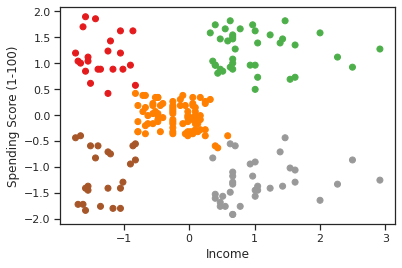

In [ ]:
# 2D scatter plot of labelled records
plt.scatter(df2_scaled[:, 0], df2_scaled[:, 1], c=m1.labels_, cmap=plt.cm.Set1)
plt.xlabel('Income')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
# cophenet index or cophenetic correlation is a measure of the correlation 
#between the distance of points in feature space and 
#distance on dendrogram
# closer it is to 1, the better is the clustering
#min or single | max or complete | 
Z = linkage(df1_scaled, 'average')   # cophenetic distance (single/complete/average/ward)
c, coph_dists = cophenet(Z , pdist(df1_scaled))
c

0.7414031527090104

In [ ]:
from sklearn.cluster import AgglomerativeClustering 
m2 = AgglomerativeClustering(n_clusters=6, affinity='euclidean',linkage='average')
m2.fit(df1_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=6)

In [ ]:
from sklearn import metrics
metrics.silhouette_score(df1_scaled,m1.labels_)

0.4566283030197353

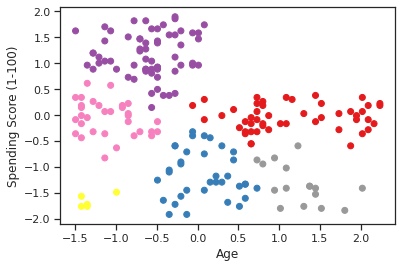

In [ ]:
# 2D scatter plot of labelled records
plt.scatter(df1_scaled[:, 0], df1_scaled[:, 1], c=m2.labels_, cmap=plt.cm.Set1)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

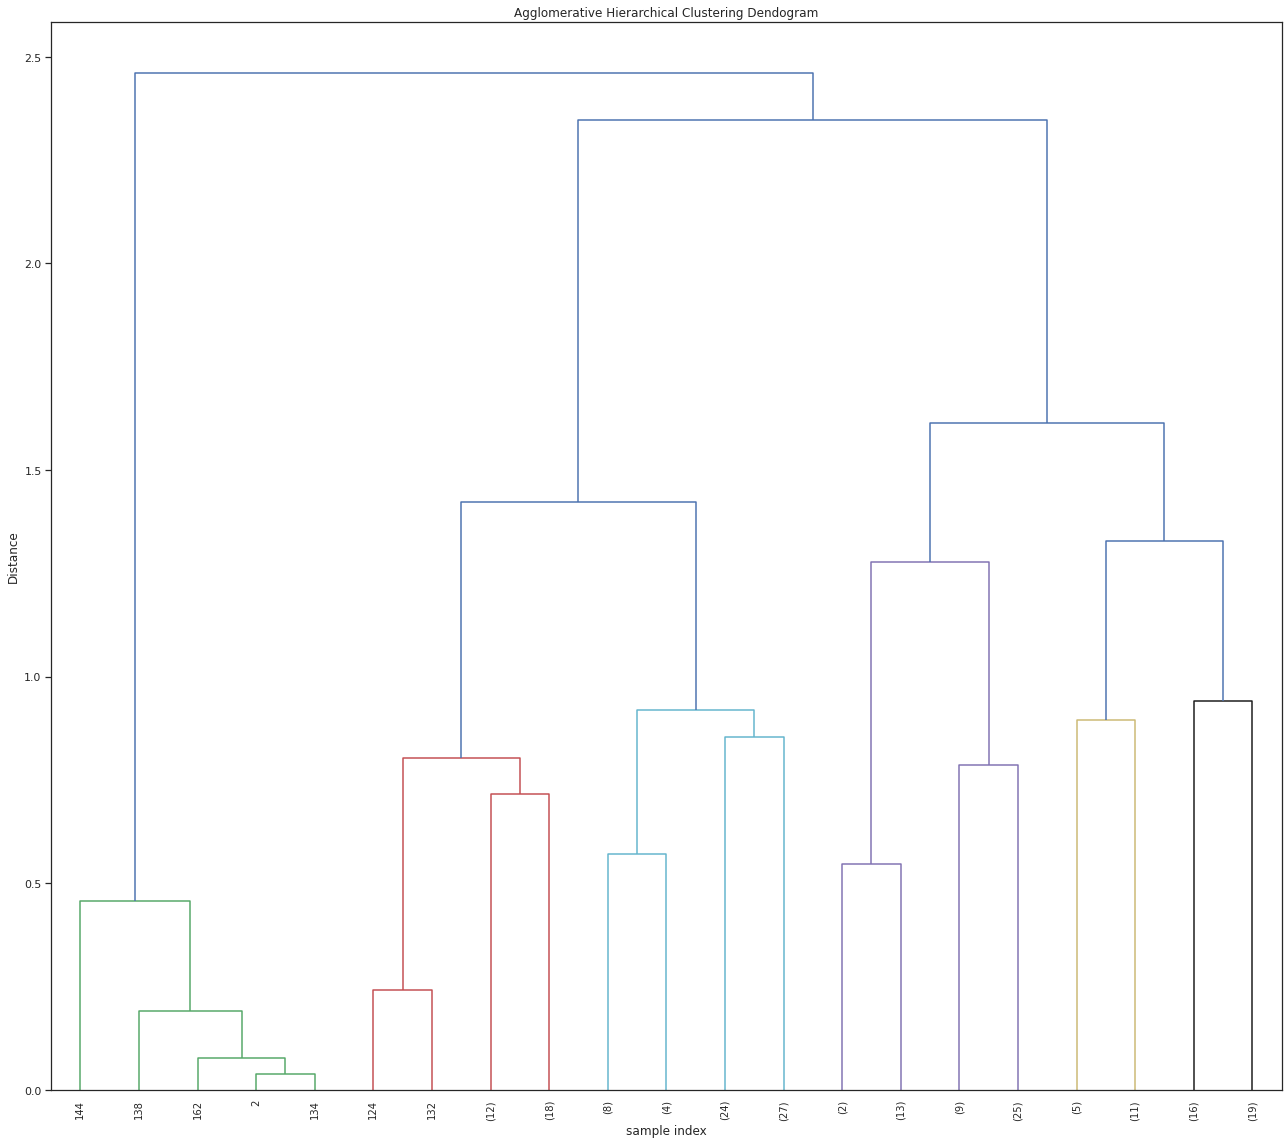

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(df1_sc_df, 'average')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=4,color_threshold=1.32)
plt.tight_layout()

# ---------------------------------- HAPPY LEARNING ---------------------------------------------